# 三明のノートブック
## 分析内容
視聴時間毎の文末における「草」の頻度分析

## 前処理
### 汎用的なものをimport

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

### データの読み込み

In [2]:
df_comment = pd.read_csv("./data/comments.csv", header=0, index_col=None, parse_dates=["inserted_at"])

### 時間とコメントのみの分析

In [3]:
# データの切り出し
df_com_time  = df_comment[["inserted_at","message","content_id"]].copy()
df_com_time["inserted_at"] = pd.to_datetime(df_com_time["inserted_at"],utc=True)
# 日本時間にする
df_com_time.index = pd.DatetimeIndex(df_com_time.inserted_at, name="inserted_at")
df_com_time.index = df_com_time.index.tz_convert("Asia/Tokyo")
df_comment_time = df_com_time[["content_id","message"]].copy()
df_comment_time

#df_com_time.inserted_at = df_com_time.index
# df_com_time.index = df_com_time.index.strftime("%Y年%m月%d日 %H時%M分%S秒") # 日本時間に変換できているかの確認用
# df_comment_time = df_com_time.reset_index(drop=True).copy()

,content_id,message
inserted_at,,
2021-11-01 00:00:16+09:00,1016369,アニメ化おめでとう！！！！！
2021-11-01 00:00:30+09:00,1016369,アニメ化おめでとう！！まじか？！
2021-11-01 00:00:35+09:00,1016369,遂にアニメ化来た！おめでとう！！！！
2021-11-01 00:00:40+09:00,1016369,やっぱりアニメ化か！おめでとうございます🎊
2021-11-01 00:00:41+09:00,1016369,おめでとうアニメ化！アーニャ可愛いなぁ
...,...,...
2022-03-31 18:27:27+09:00,1026940,キャラデザすごすぎぃ…ウルト○マンに出てくる怪獣みたいに洗練されてるじゃん…
2022-03-31 18:47:30+09:00,1025345,雷(トニト)一閃は草
2022-03-31 19:18:28+09:00,1026940,ジジは何食べてそんなにデカくなったんだ


### 文末が特定のワードのものを抜き出す  
抜き出すワード  
- 草
- w
- 笑

In [4]:
kusaRegex = "草(?=[…、。\swWｗＷ()]|$)"#'草(?:\\n|$)'
waraRegex = "笑(?=[…、。\swWｗＷ()]|$)"#'笑(?:\\n|$)'
sibaRegex = "[wWｗＷ]+(?=[…、。\s()]|$)"#'w(?:\\n|$)'
regex = kusaRegex + '|' +  waraRegex + '|' + sibaRegex
df_only_target = df_comment_time[df_comment_time["message"].str.contains(regex)]
df_only_target

,content_id,message
inserted_at,,
2021-12-13 00:20:10+09:00,1018845,笑
2021-12-13 02:32:22+09:00,1018845,草
2021-12-13 09:37:50+09:00,1018845,草\nこの家族ならではだな
2021-12-13 12:50:57+09:00,1018845,笑
2021-12-13 19:53:03+09:00,1018845,wwwwww
2022-01-23 00:11:23+09:00,1021172,草
2022-01-24 00:03:00+09:00,1021552,www
2022-01-24 00:03:02+09:00,1021552,www
2022-01-26 16:04:21+09:00,1021172,www


## 人がよく「w,草,笑」を文末で使う時間帯の可視化
### 時間帯ごとのデータの切り方の例

In [5]:
hoge = df_only_target.between_time("0:00:00", "6:00:00")
hoge.index = hoge.index.strftime("%Y年%m月%d日 %H時%M分%S秒") # 日本時間に変換できているかの確認用

### 2時間毎にデータの内訳を確認

In [6]:
delimitation = list(range(0,24,2))
delimitation.append(0)
rate_arr = [] # 対象となる単語を含むコメントの割合
for i in range(len(delimitation) - 1):
    total_num = df_comment_time.between_time("{}:00:00".format(delimitation[i]),
                                             "{}:00:00".format(delimitation[i+1])).shape[0]
    target_num = df_only_target.between_time("{}:00:00".format(delimitation[i]),
                                             "{}:00:00".format(delimitation[i+1])).shape[0]
    rate_arr.append(target_num / total_num * 100)
    print("{0}時 - {1}時\t| {2:.2f}% \ttotal: {3}, \ttarget: {4}".format(delimitation[i],
                                                                        delimitation[i+1],
                                                                        rate_arr[-1], 
                                                                        total_num,
                                                                        target_num))

0時 - 2時	| 0.02% 	total: 40676, 	target: 9
2時 - 4時	| 0.03% 	total: 6402, 	target: 2
4時 - 6時	| 0.03% 	total: 3433, 	target: 1
6時 - 8時	| 0.01% 	total: 7764, 	target: 1
8時 - 10時	| 0.01% 	total: 9013, 	target: 1
10時 - 12時	| 0.00% 	total: 6347, 	target: 0
12時 - 14時	| 0.02% 	total: 6412, 	target: 1
14時 - 16時	| 0.02% 	total: 4204, 	target: 1
16時 - 18時	| 0.03% 	total: 3984, 	target: 1
18時 - 20時	| 0.05% 	total: 4139, 	target: 2
20時 - 22時	| 0.00% 	total: 4440, 	target: 0
22時 - 0時	| 0.00% 	total: 4406, 	target: 0


### ヒストグラムの描画
#### 全てのコメント数

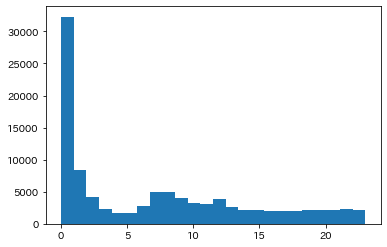

In [7]:
plt.hist(np.asarray(df_comment_time.index.hour), bins=24)
plt.show()

#### 対象となるコメント数

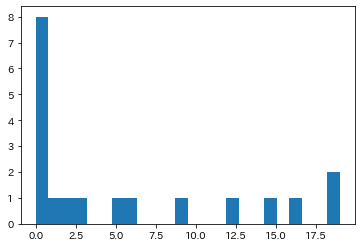

In [8]:
plt.hist(np.asarray(df_only_target.index.hour), bins=24)
plt.show()

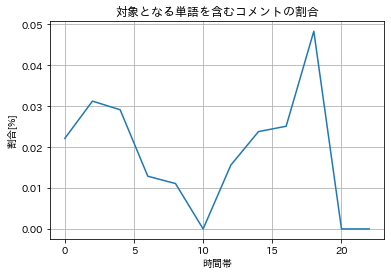

In [9]:
plt.plot(delimitation[:-1], rate_arr)
plt.title("対象となる単語を含むコメントの割合")
plt.xlabel("時間帯") 
plt.ylabel("割合[%]") 
plt.grid(True)

## 作品ごとの文末表現の違い
### データフレームの作成

In [10]:
# データの読み出し
df_con = pd.read_csv("./data/contents.csv",header=0,index_col=None)
df_com = pd.read_csv("./data/comments.csv", header=0, index_col=None, parse_dates=["inserted_at"])

# データの切り出し
df_com_reduced  = df_com[["inserted_at","message","content_id"]]
df_con_reduced  = df_con[["work_name", "content_id"]]

# データのマージ
df_com_time = df_con_reduced.merge(df_com_reduced, on=["content_id"])

# 日本時間にする
df_com_time["inserted_at"] = pd.to_datetime(df_com_time["inserted_at"],utc=True)
df_com_time.index = pd.DatetimeIndex(df_com_time.inserted_at, name="inserted_at")
df_com_time.index = df_com_time.index.tz_convert("Asia/Tokyo")
df_comment_time = df_com_time[["work_name","message"]].copy()

# 特定のワードで切り出す
df_only_target = df_comment_time[df_comment_time["message"].str.match(regex)]

### 作品毎の対象となる単語を含むコメントの割合を算出

In [11]:
# 作品名のリスト
work_name_list = list(df_con[["work_name"]][~df_con[["work_name"]].duplicated()].work_name)

rate_dict = {}

for work_name in work_name_list:
    rate_arr = [] # 対象となる単語を含むコメントの割合
    print("---------------------------------")
    print("作品名: {}".format(work_name))
    df_work = df_comment_time[df_comment_time["work_name"] == work_name]
    df_work_target = df_only_target[df_only_target["work_name"] == work_name]
    for i in range(len(delimitation) - 1):
        total_num = df_work.between_time("{}:00:00".format(delimitation[i]),
                                         "{}:00:00".format(delimitation[i+1])).shape[0]
        target_num = df_work_target.between_time("{}:00:00".format(delimitation[i]),
                                                 "{}:00:00".format(delimitation[i+1])).shape[0]
        rate_arr.append(target_num / total_num * 100)
        print("{0}時 - {1}時\t| {2:.2f}% \ttotal: {3}, \ttarget: {4}".format(delimitation[i],
                                                                            delimitation[i+1],
                                                                            rate_arr[-1], 
                                                                            total_num,
                                                                            target_num))
    rate_dict[work_name] = rate_arr

---------------------------------
作品名: 阿波連さんははかれない
0時 - 2時	| 0.06% 	total: 1699, 	target: 1
2時 - 4時	| 0.00% 	total: 294, 	target: 0
4時 - 6時	| 0.00% 	total: 145, 	target: 0
6時 - 8時	| 0.00% 	total: 254, 	target: 0
8時 - 10時	| 0.00% 	total: 389, 	target: 0
10時 - 12時	| 0.00% 	total: 301, 	target: 0
12時 - 14時	| 0.00% 	total: 224, 	target: 0
14時 - 16時	| 0.00% 	total: 145, 	target: 0
16時 - 18時	| 0.81% 	total: 123, 	target: 1
18時 - 20時	| 0.00% 	total: 108, 	target: 0
20時 - 22時	| 0.00% 	total: 137, 	target: 0
22時 - 0時	| 0.00% 	total: 142, 	target: 0
---------------------------------
作品名: 左ききのエレン
0時 - 2時	| 0.03% 	total: 3144, 	target: 1
2時 - 4時	| 0.00% 	total: 440, 	target: 0
4時 - 6時	| 0.00% 	total: 284, 	target: 0
6時 - 8時	| 0.00% 	total: 487, 	target: 0
8時 - 10時	| 0.00% 	total: 613, 	target: 0
10時 - 12時	| 0.00% 	total: 430, 	target: 0
12時 - 14時	| 0.00% 	total: 389, 	target: 0
14時 - 16時	| 0.00% 	total: 265, 	target: 0
16時 - 18時	| 0.00% 	total: 229, 	target: 0
18時 - 20時	| 0.00% 	total: 223, 	targe

### グラフ表示

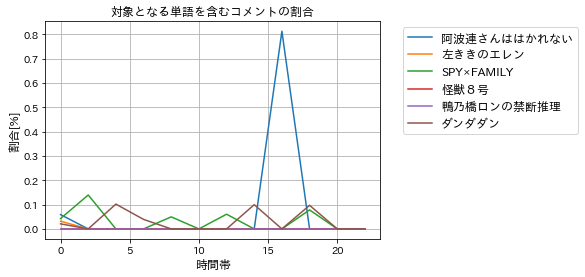

In [12]:
for work_name in work_name_list:
    plt.plot(delimitation[:-1], np.asarray(rate_dict[work_name]), label=work_name)
plt.title("対象となる単語を含むコメントの割合", fontsize=12)
plt.xlabel("時間帯", fontsize=12) 
plt.ylabel("割合[%]", fontsize=12) 
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12)
plt.grid(True)